LOGISTIC REGRESSION FOR PARIS CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

READING THE PARIS HOUSE CLASSIFICATION FILE

In [2]:
Paris_data = pd.read_csv("ParisHousingClass.csv")

In [3]:
paris = Paris_data.copy() # making a copy to avoid loss of data
paris.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2,Basic
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5,Luxury
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3,Basic
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2,Basic
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1,Basic


In [4]:
paris.info()


#we have 16 integer values and one float value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
paris.shape

(10000, 18)

In [6]:
paris.describe(include='all')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basic
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8735
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06,NaN
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06,NaN
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04,NaN
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06,NaN
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06,NaN
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06,NaN


In [7]:
#checking for null values
paris.isnull().sum()   
#paris_c.drop('Luxury', axis =1)

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

From the above we can see that the data is complete and has no null values

###### EDA

description of some of the features in the dataset

In [8]:
#sns.pairplot(paris_copy)

<AxesSubplot:xlabel='category', ylabel='count'>

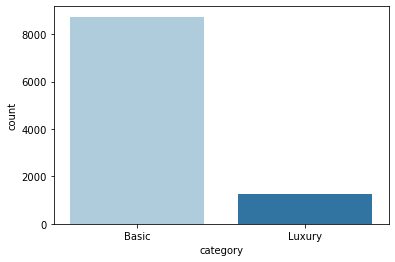

In [9]:
#count plot to show how many of the houses are basic or luxury
palette = sns.color_palette("bright")
#sns.palplot(palette)
sns.set_palette("Paired")

sns.countplot(x='category', data= paris)

<AxesSubplot:xlabel='category', ylabel='count'>

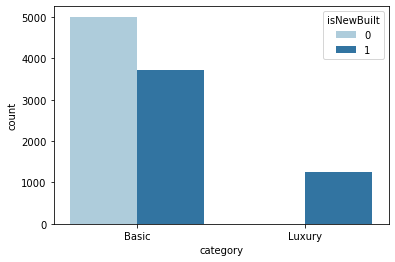

In [10]:
sns.countplot(x='category',hue='isNewBuilt', data= paris)
#we can see most of the basic houses are newly built compared to the luxury, but luxury houses only contain newly built houses

<AxesSubplot:xlabel='category', ylabel='count'>

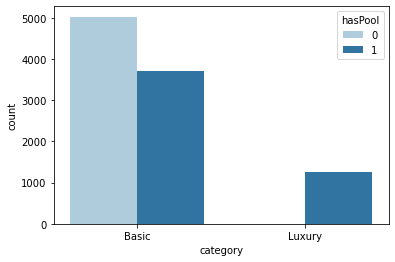

In [11]:
#comparing the house categories to the number of pools
sns.countplot(x='category',hue='hasPool', data= paris)
#we can see that all luxury houses must have a pool

<AxesSubplot:xlabel='cityPartRange', ylabel='count'>

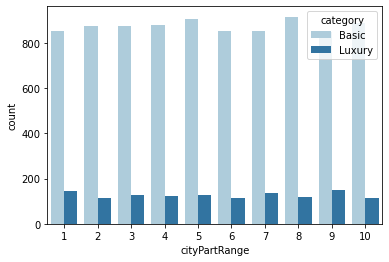

In [12]:
sns.countplot(x='cityPartRange',hue='category', data= paris)  
#luxury houses exist in each exclusive neighbourhood.

<AxesSubplot:xlabel='category', ylabel='price'>

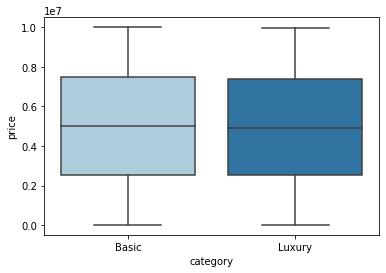

In [13]:
sns.boxplot(x='category',y='price', data= paris) #Both luxury and basic houses have similar prices

C:\Users\bande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

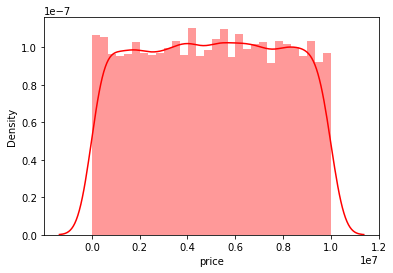

In [14]:
sns.distplot(paris["price"], bins= 30, color='red')
#show the distirbution of price


<AxesSubplot:>

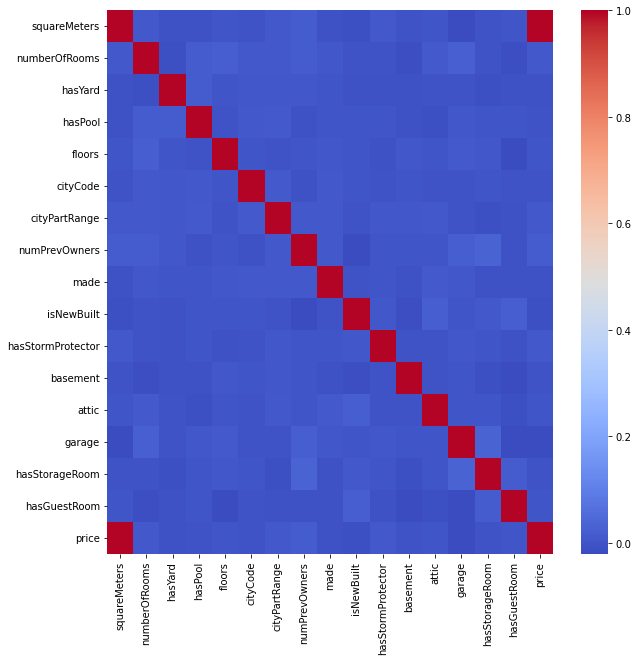

In [15]:
plt.figure(figsize=(10,10))
cor= paris.corr()
sns.heatmap(cor, annot=False, cmap='coolwarm')
#there is a linear relationship between squaremeters and prices,therefore squaremeters will be dropped and prices will be used as a feature .

####                                                           PRE PROCESSING & MODEL BUILDING

In [16]:
#convert category to numbers so it can be understood by the program
pd.get_dummies(paris['category'])

new = pd.get_dummies(paris['category'], drop_first =True) 
#dropping first column to avaoid issue of multi collinerity, as one colum is a perfect predictor of the other
new

,Luxury
0,0
1,1
2,0
3,0
4,1
...,...
9995,0
9996,0
9997,0
9998,0


In [20]:
paris = paris.rename(columns={"Luxury":"house_category"}) #Renaming the dummy variable


PERFORMING CLASSIFICATION WITHOUT SCALING USING LOGISTIC REGRESSION

In [21]:
paris = pd.concat([paris, new], axis =1) #added the new column luxury into the data

In [22]:
#set my Y and X features
X = paris[[ "numberOfRooms", "hasYard", 'hasPool', "floors", "cityCode", "cityPartRange", "numPrevOwners", 
               "made", "isNewBuilt", "hasStormProtector", "basement", "attic", "garage", "hasStorageRoom", "hasGuestRoom",
                "price"]]
y= paris["house_category"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42) #spliting trst and train by 70/30

In [24]:
#import logistic regresson
from sklearn.linear_model import LogisticRegression

start = time.time()     #to take record of the time it uses to train  
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
stop = time.time()      #to take record of when the training is done
print(f"Training time: {stop - start}s")

Training time: 0.10435104370117188s


In [25]:
predictions = logmodel.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

#the classifier didnt classify 392 cases correctly due to the imbalance existing in the luxury cataegory, therefore adjustments will be made to improve this result

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2608
           1       0.00      0.00      0.00       392

    accuracy                           0.87      3000
   macro avg       0.43      0.50      0.47      3000
weighted avg       0.76      0.87      0.81      3000

[[2608    0]
 [ 392    0]]


C:\Users\bande\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bande\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bande\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####                                              HYPER TUNNING OF LOGISTIC REGRESSION TO IMPROVE ACCURACY

In [61]:
#defining my x and y features from the original copy of thr dataset Paris.
 #the dependent variable here hasnt been scaled
X = paris[[ "numberOfRooms", "hasYard", 'hasPool', "floors", "cityCode", "cityPartRange", "numPrevOwners", 
               "made", "isNewBuilt", "hasStormProtector", "basement", "attic", "garage", "hasStorageRoom", "hasGuestRoom",
                "price"]]

y= paris["house_category"]

In [62]:
#scaling the x variables to remove outliers
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(X)


In [63]:
#spliting the train and test set
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, test_size=0.3, random_state=42)




In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logmodel1 = LogisticRegression()


param_grid = [   
    {
     'class_weight':['balanced'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'solver' : ['newton-cg'],
'max_iter' : [100, 1000,2500, 5000]
   }
]


clf = GridSearchCV(logmodel1, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
#didnt specify a penalty so it doesnt affect the c and solver chosen
#class_weight is to deal with the imbalanced nature of the dependent variable


In [31]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


C:\Users\bande\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bande\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bande\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bande\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bande\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

In [65]:
best_clf.best_estimator_        #the best fit for the model

LogisticRegression(C=0.01, class_weight='balanced', solver='newton-cg')

In [66]:
#using the best fit c score to fit the test da
logmodel1 = LogisticRegression(C=0.01, solver = 'newton-cg', class_weight ='balanced', max_iter =4000)




start = time.time()     #to take record of the time it uses to train
logmodel1.fit(Xtrain, ytrain)
stop = time.time()      #to take record of when the training is done
print(f"Training time: {stop - start}s")     #how long the training took

C:\Users\bande\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bande\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bande\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bande\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bande\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

Training time: 1.204807996749878s


C:\Users\bande\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\bande\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bande\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [70]:
#testing the model on a test set, noticed the hypertuned parameters classifies properly on this dataset better than the previous methods
predict = logmodel1.predict(Xtest)


from sklearn.metrics import classification_report,confusion_matrix    

print(classification_report(ytest, predict))
print(confusion_matrix(ytest, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2608
           1       1.00      1.00      1.00       392

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[2608    0]
 [   0  392]]


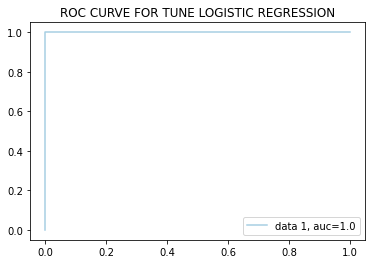

In [68]:
from sklearn import metrics
#define metrics
y_pred_proba = logmodel1.predict(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC CURVE FOR TUNE LOGISTIC REGRESSION')
plt.show()

######                                            RANDOM FOREST CLASSIFIER


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
#no scaling was done

In [77]:
#defining my x and y features. the dependent variable here hasnt been scaled. still at its 83 to 12 ratio
X = paris[[ "numberOfRooms", "hasYard", 'hasPool', "floors", "cityCode", "cityPartRange", "numPrevOwners", 
               "made", "isNewBuilt", "hasStormProtector", "basement", "attic", "garage", "hasStorageRoom", "hasGuestRoom",
                "squareMeters"]]

y= paris["house_category"]
trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.30, random_state=42)

In [78]:
rfc = RandomForestClassifier()
start = time.time()
rfc.fit(trainx,trainy)
stop = time.time()

print(f"Training time: {stop - start}s")



predict = rfc.predict(testx)

Training time: 0.8926181793212891s


In [79]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(testy,predict))
print('\n')
print(confusion_matrix(testy,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2608
           1       1.00      1.00      1.00       392

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



[[2608    0]
 [   0  392]]


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [43]:
#scaling the x variables to remove outliers
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler() 
scaled_X = scaler.fit_transform(X)


In [44]:
#defining my x and y features. the dependent variable here hasnt been scaled. still at its 83 to 12 ratio
X = paris[[ "numberOfRooms", "hasYard", 'hasPool', "floors", "cityCode", "cityPartRange", "numPrevOwners", 
               "made", "isNewBuilt", "hasStormProtector", "basement", "attic", "garage", "hasStorageRoom", "hasGuestRoom",
                "squareMeters"]]

y= paris["house_category"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=101)

In [45]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

#score=cross_val_score(logmodel,x_scaled,y,cv=skf)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = scaled_X[train_index], scaled_X[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
rfc = RandomForestClassifier(n_estimators=60)

TRAIN: [   0    2    3 ... 9996 9997 9999] TEST: [   1    9   12 ... 9991 9994 9998]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [   3    4   10 ... 9983 9984 9996]
TRAIN: [   0    1    3 ... 9997 9998 9999] TEST: [   2    5    6 ... 9981 9987 9989]
TRAIN: [   0    1    2 ... 9995 9996 9998] TEST: [  13   15   20 ... 9990 9997 9999]
TRAIN: [   1    2    3 ... 9997 9998 9999] TEST: [   0    8   11 ... 9992 9993 9995]


In [46]:
start = time.time()
rfc.fit(Xtrain,ytrain)
stop = time.time()

In [47]:
print(f"Training time: {stop - start}s")

Training time: 0.6309165954589844s


In [48]:
prediction = rfc.predict(Xtest)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,prediction))
print('\n')
print(confusion_matrix(ytest,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1747
           1       1.00      1.00      1.00       253

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



[[1747    0]
 [   0  253]]


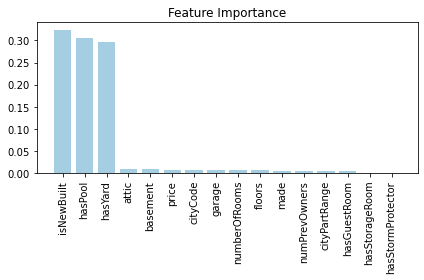

In [50]:
importances = rfc.feature_importances_
#
# Sort the feature importance in descending order
#
#plt.figure(figsize=(10,10))
#plt.figure(figsize=(10,10))
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

The random classifier had an accuracy of 1.0 and classified all its instances correctly, even with different ranges of estimators (60-600). Since we achieved a highrate of precision, accuracy and recall, we wouldnt be tuning the hyper parameters for the random forest.

# SUPPORT VECTOR CLASSIFIER

In [51]:
from sklearn.model_selection import train_test_split

In [92]:
#scaling the x variables to remove outliers

from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler() 
scaled_X = scaler.fit_transform(X)


In [91]:
#defining my x and y features. the dependent variable here hasnt been scaled. still at its 83 to 12 ratio
X = paris[[ "numberOfRooms", "hasYard", 'hasPool', "floors", "cityCode", "cityPartRange", "numPrevOwners", 
               "made", "isNewBuilt", "hasStormProtector", "basement", "attic", "garage", "hasStorageRoom", "hasGuestRoom",
                "price"]]
y= paris["house_category"]

_Xtrain, _Xtest, _ytrain, _ytest = train_test_split(scaled_X, y, test_size=0.30, random_state=42)

In [93]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
regressor =SVC()

In [94]:
start = time.time()
regressor.fit(_Xtrain,_ytrain)

stop = time.time()

print(f"Training time: {stop - start}s")

Training time: 0.6589951515197754s


In [95]:
predictions = regressor.predict(_Xtest)

In [96]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(_ytest,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2608
           1       1.00      1.00      1.00       392

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



[[2608    0]
 [   0  392]]


The support vector classifier had an accuracy of 1.0 and classified all its instances correctly, at default setting after scaling its indepent variables X